Radar Chart for Allocation Effectiveness

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# Load the CSV file
file_path = "C:/Users/bhavy/Downloads/one.csv"
data = pd.read_csv(file_path)

# Function to parse the target ranges from string format
def parse_range(value):
    min_val, max_val = value.split('-')
    return (int(min_val), int(max_val))

# Function to update the radar chart based on selected category
def update_chart(category):
    # Extract data specifically for the selected category and parse target values
    category_data = data[data['Product Category'] == category]
    
    # Parse the values
    target_values_doh = parse_range(category_data['Days on Hand (DOH, days)'].values[0])
    target_values_str = parse_range(category_data['Sell Through Rate (STR, %)'].values[0])
    target_values_velocity = parse_range(category_data['Sales Velocity (units/week)'].values[0])
    target_values_osa = parse_range(category_data['On-Shelf Availability (OSA, %)'].values[0])

    # Setting up target ranges for the lower and upper ends
    values_lower = [
        target_values_velocity[0],  # Lower end of Sales Velocity
        target_values_doh[0],       # Lower end of DOH
        target_values_str[0],       # Lower end of STR
        target_values_osa[0]        # Lower end of OSA
    ]
    values_lower += values_lower[:1]  # Complete the loop for radar plot

    values_upper = [
        target_values_velocity[1],  # Upper end of Sales Velocity
        target_values_doh[1],       # Upper end of DOH
        target_values_str[1],       # Upper end of STR
        target_values_osa[1]        # Upper end of OSA
    ]
    values_upper += values_upper[:1]  # Complete the loop for radar plot

    # Setting up the radar chart for the lower and upper target values with grey filling between the ranges
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
    metrics = ['Sales Velocity', 'DOH', 'STR', 'OSA']
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Setting the metrics and target ranges for the selected category
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=14, fontweight='bold', color='#434343')
    ax.set_ylim(0, 160)  # Adjusted scale for metrics up to 160

    # Plotting lower and upper target values
    ax.plot(angles, values_lower, color='#ADAFB2', linewidth=2.5, linestyle='dashed', label='Lower End of Range')
    ax.fill(angles, values_lower, color='#434343', alpha=0.4)
    ax.plot(angles, values_upper, color='#ADAFB2', linewidth=2.5, linestyle='dashed', label='Upper End of Range')

    # Fill the area between the lower and upper ranges with grey color
    ax.fill_between(angles, values_lower, values_upper, color='#434343', alpha=0.3)

    # Customizing the grid and radial labels
    ax.grid(color='gray', linestyle='--', linewidth=0.6, alpha=0.6)
    ax.spines['polar'].set_visible(False)
    ax.set_rlabel_position(0)
    ax.tick_params(axis='y', colors='gray', labelsize=12)

    # Adding a legend
    ax.legend(loc='upper right', fontsize=12, bbox_to_anchor=(1.15, 1.15), frameon=False)

    # Display the chart
    plt.show()

# Create a dropdown menu for selecting the product category
categories = data['Product Category'].unique()
dropdown = widgets.Dropdown(options=categories, description='Category:')

# Use the interact function to link the dropdown menu with the update_chart function
interact(update_chart, category=dropdown)


interactive(children=(Dropdown(description='Category:', options=('Apparel', 'Furniture', 'Beauty Products', 'G…

<function __main__.update_chart(category)>

sMAPE and Tracking Signals for Forecast Accuracy

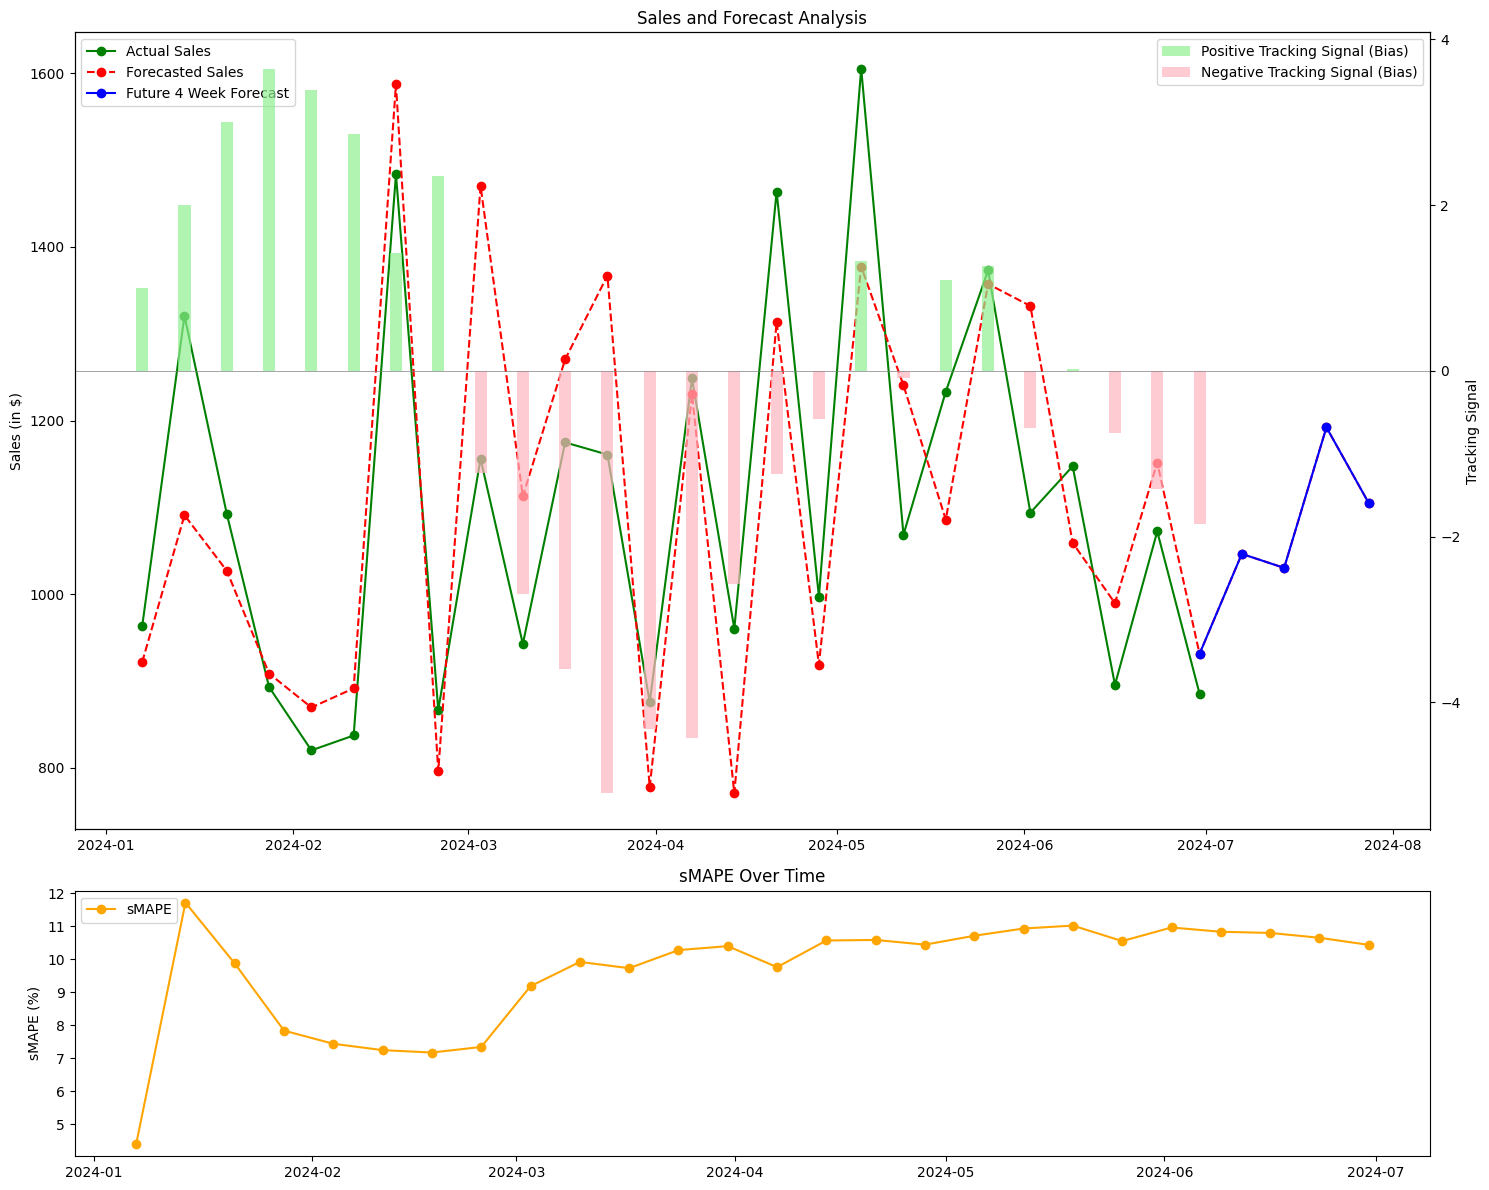

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from your Excel file
df = pd.read_excel("C:/Users/bhavy/Downloads/sMAPE and TS Calculation.xlsx")  # Replace with your actual file path

# Convert 'Week' column to datetime format
df['Week'] = pd.to_datetime(df['Week'])

# Creating figure and axes with a secondary y-axis for the tracking signal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [3, 1]})

# Plotting the actual sales in green
ax1.plot(df['Week'], df['Actual_Sales'], marker='o', color='green', linestyle='-', label='Actual Sales')

# Plotting the forecasted sales as a dashed red line
ax1.plot(df['Week'], df['Forecast_Sales'], linestyle='--', color='red', marker='o', label='Forecasted Sales')

# Plotting the future 4-week forecast, starting from one point earlier
ax1.plot(df['Week'][-5:], df['Forecast_Sales'][-5:], linestyle='-', color='blue', marker='o', label='Future 4 Week Forecast')

# Creating a secondary y-axis for the tracking signal
ax1b = ax1.twinx()

# Highlighting tracking signals with thinner bars: light green for positive, light pink for negative, adding spaces between bars
positive_bars = ax1b.bar(df['Week'], df['Tracking Signal'].clip(lower=0), color='lightgreen', alpha=0.7, width=2, label='Positive Tracking Signal (Bias)')
negative_bars = ax1b.bar(df['Week'], df['Tracking Signal'].clip(upper=0), color='lightpink', alpha=0.7, width=2, label='Negative Tracking Signal (Bias)')
ax1b.set_ylabel('Tracking Signal')
ax1b.axhline(0, color='grey', linewidth=0.5)

# Customizing axes labels, title, and legend
ax1.set_ylabel('Sales (in $)')
ax1.set_title('Sales and Forecast Analysis')
ax1.legend(loc='upper left')
ax1b.legend([positive_bars, negative_bars], ['Positive Tracking Signal (Bias)', 'Negative Tracking Signal (Bias)'], loc='upper right')
ax1.grid(False)

# Plotting sMAPE as a secondary line plot with orange color
ax2.plot(df['Week'], df['sMAPE'], marker='o', color='orange', linestyle='-', label='sMAPE')
ax2.set_ylabel('sMAPE (%)')
ax2.set_title('sMAPE Over Time')
ax2.legend(loc='upper left')
ax2.grid(False)

# Adjusting layout for better visual alignment
plt.tight_layout()
plt.show()

Bubble Chart: Inventory Management Visualisation by SKU

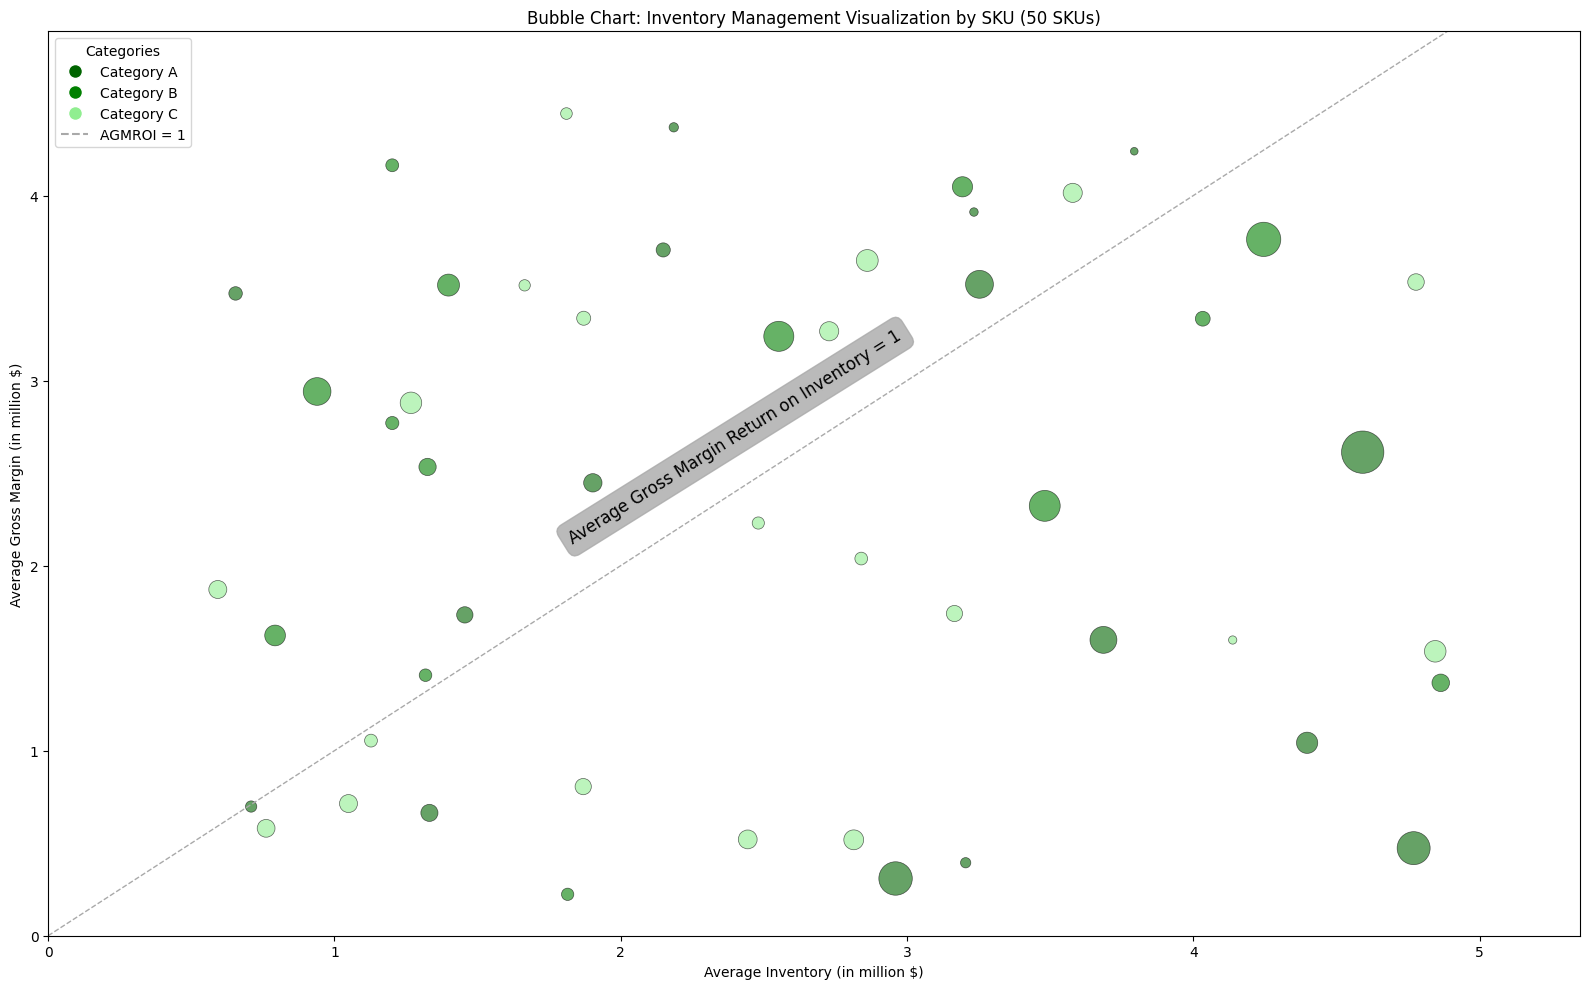

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generating sample data for 50 SKUs
np.random.seed(42)  # For reproducibility
num_skus = 50  # Reduced number of SKUs

# Randomly generating data for SKUs
avg_inventory = np.random.uniform(0.5, 5.0, num_skus)  # Average Inventory in million $
avg_gross_margin = np.random.uniform(0.2, 4.5, num_skus)  # Average Gross Margin in million $
units_sold = np.random.randint(50, 5000, num_skus)  # Number of units sold
categories = np.random.choice(['Category A', 'Category B', 'Category C'], num_skus)  # Random categories

# Define colors for different categories: change blue to dark green, orange to light green
colors = {'Category A': 'darkgreen', 'Category B': 'green', 'Category C': 'lightgreen'}
bubble_colors = [colors[cat] for cat in categories]

# Bubble sizes scaled for units sold
bubble_sizes = [units * 0.05 for units in units_sold]  # Scaling bubble sizes

# Randomly select some SKUs to increase their bubble sizes to imitate real scenarios
larger_bubbles_indices = np.random.choice(num_skus, size=int(num_skus * 0.2), replace=False)  # Selecting 20% of SKUs randomly
for idx in larger_bubbles_indices:
    bubble_sizes[idx] *= np.random.uniform(2, 5)  # Amplify sizes by a random factor between 2 and 5

# Creating the bubble chart with proper markers
plt.figure(figsize=(16, 10))
plt.scatter(avg_inventory, avg_gross_margin, s=bubble_sizes, c=bubble_colors, alpha=0.6, marker='o', edgecolors='black', linewidth=0.5)

# Adding AGMROI = 1 line
x_values = np.linspace(0, max(avg_inventory) * 1.1, 100)
plt.plot(x_values, x_values, color='darkgrey', linestyle='--', linewidth=1, label='AGMROI = 1')

# Annotate the AGMROI line with a box
plt.text(
    x=2.4, y=2.1,
    s="Average Gross Margin Return on Inventory = 1",
    color='black', fontsize=12, rotation=32,
    ha='center', va='bottom',
    bbox=dict(
        facecolor='darkgrey', edgecolor='darkgrey', boxstyle='round,pad=0.5', alpha=0.8
    )
)

# Setting the origin to (0, 0)
plt.xlim(0, max(avg_inventory) * 1.1)  # Extending the x-axis slightly beyond the maximum value
plt.ylim(0, max(avg_gross_margin) * 1.1)  # Extending the y-axis slightly beyond the maximum value

# Adding labels, grid, and title
plt.title('Bubble Chart: Inventory Management Visualization by SKU (50 SKUs)')
plt.xlabel('Average Inventory (in million $)')
plt.ylabel('Average Gross Margin (in million $)')


# Creating a custom legend for categories
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cat, markersize=10, 
                      markerfacecolor=color) for cat, color in colors.items()]
plt.legend(handles=handles + [plt.Line2D([0], [0], color='darkgrey', linestyle='--', label='AGMROI = 1')], 
           title='Categories', loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

Horizontal Stacked Barchart for Excess Inventory

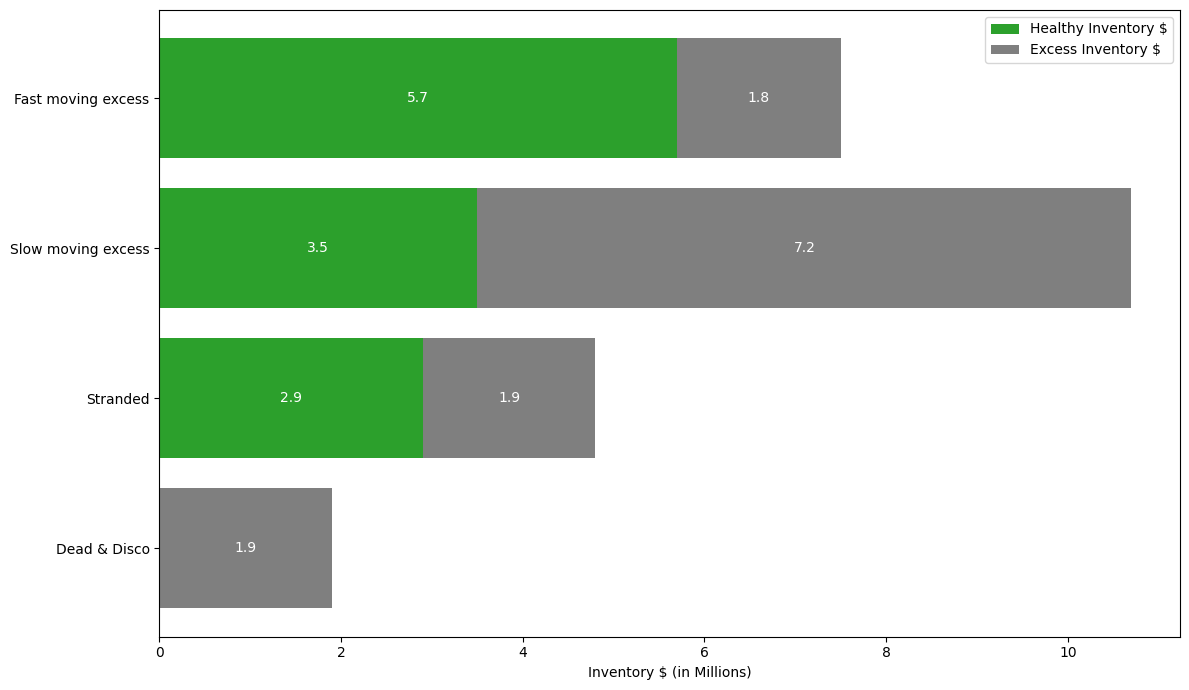

In [5]:
import matplotlib.pyplot as plt

# Data for visualization with combined categories
categories = [
    "Dead & Disco",
    "Stranded",
    "Slow moving excess",
    "Fast moving excess"
]
# Combine data for "Dead excess" and "Discontinued excess"
total_inventory = [1.9, 4.8, 10.7, 7.5]  # 1.2 + 0.7 combined
excess_inventory = [1.9, 1.9, 7.2, 1.8]   # 1.2 + 0.7 combined

# Calculate the healthy inventory (Total - Excess)
healthy_inventory = [total - excess for total, excess in zip(total_inventory, excess_inventory)]

# Plotting horizontal stacked bar chart
plt.figure(figsize=(12, 7))
bars_healthy = plt.barh(categories, healthy_inventory, label='Healthy Inventory $', color='#2ca02c')
bars_excess = plt.barh(categories, excess_inventory, left=healthy_inventory, label='Excess Inventory $', color='#7f7f7f')

# Adding data labels for healthy and excess inventory
for bar in bars_healthy:
    xval = bar.get_width()
    # Only add data labels if healthy inventory is not zero
    if xval > 0:
        plt.text(xval / 2, bar.get_y() + bar.get_height() / 2, f'{xval:.1f}', ha='center', va='center', color='white')

for bar in bars_excess:
    xval = bar.get_width() + bar.get_x()
    plt.text(xval - (bar.get_width() / 2), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}', ha='center', va='center', color='white')

# Customizing the chart

plt.xlabel('Inventory $ (in Millions)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(False)  # Removing gridlines

# Display the final visualization
plt.tight_layout()
plt.show()

In [ ]:
Lost Sales Viz

C:\Users\bhavy\AppData\Local\Temp\ipykernel_4708\808135022.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y):,}' for y in plt.gca().get_yticks()])


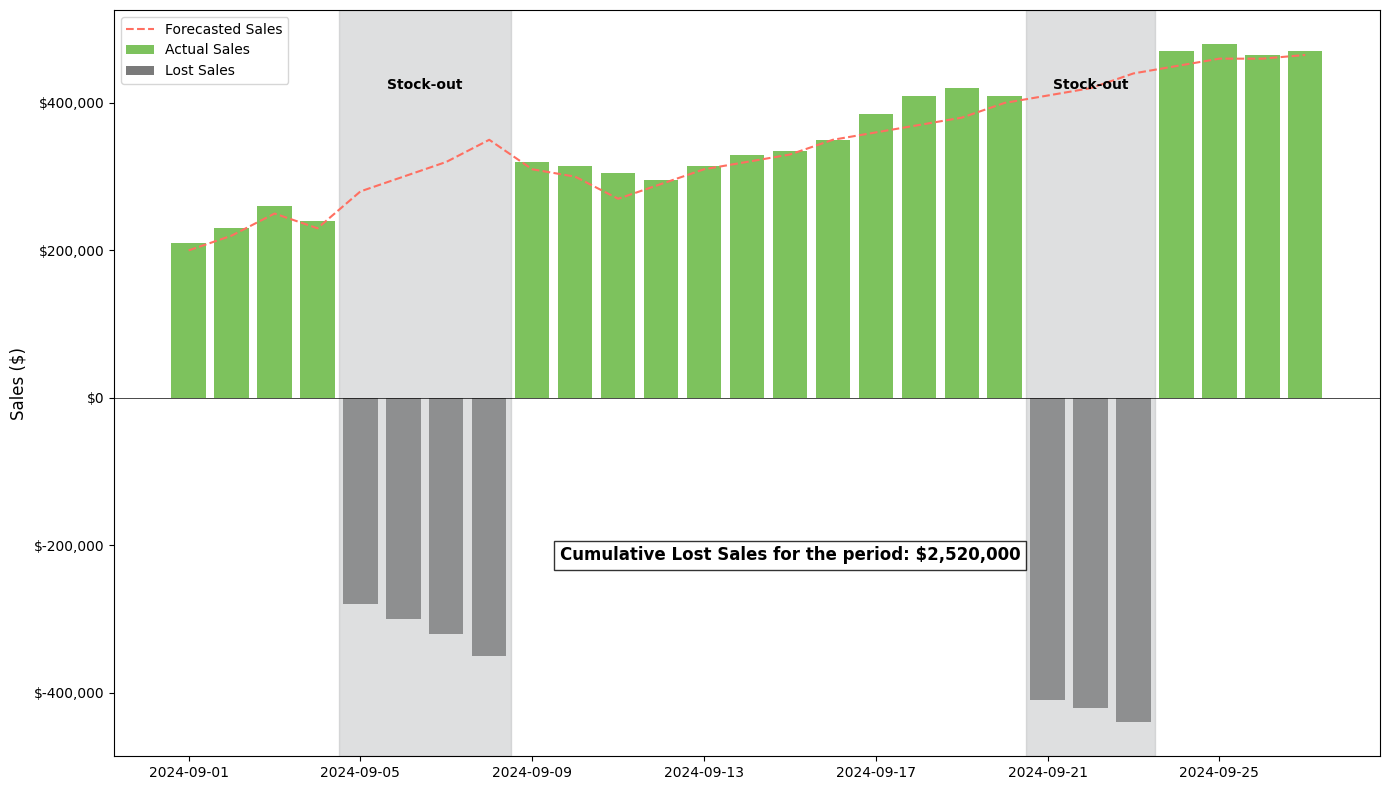

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data for the visualization
data = {
    'Date': pd.date_range(start='2024-09-01', periods=27, freq='D'),
    'Forecasted_Sales_$': [200000, 220000, 250000, 230000, 280000, 300000, 320000, 350000, 310000, 300000, 
                           270000, 290000, 310000, 320000, 330000, 350000, 360000, 370000, 380000, 400000, 
                           410000, 420000, 440000, 450000, 460000, 460000, 465000],
    'Actual_Sales_$': [210000, 230000, 260000, 240000, 0, 0, 0, 0, 320000, 315000, 
                       305000, 295000, 315000, 330000, 335000, 350000, 385000, 410000, 420000, 410000, 
                       0, 0, 0, 470000, 480000, 465000, 470000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate lost sales based on forecasted vs actual
df['Lost_Sales_$'] = df['Forecasted_Sales_$'] - df['Actual_Sales_$']
df['Lost_Sales_$'] = df['Lost_Sales_$'].apply(lambda x: x if x > 0 else 0)

# Identify stockout periods for annotation
stockout_ranges = []
start = None

# Detect stockout regions for highlighting
for i in range(len(df)):
    if df['Actual_Sales_$'].iloc[i] == 0 and start is None:  # Stockout starts
        start = df['Date'].iloc[i]
    elif df['Actual_Sales_$'].iloc[i] != 0 and start is not None:  # Stockout ends
        stockout_ranges.append((start, df['Date'].iloc[i - 1]))
        start = None

# If the stockout continues till the last date
if start is not None:
    stockout_ranges.append((start, df['Date'].iloc[-1]))

# Plotting the chart
plt.figure(figsize=(14, 8))

# Forecasted sales line
plt.plot(df['Date'], df['Forecasted_Sales_$'], linestyle='--', color='#FF6F61', label='Forecasted Sales')

# Actual sales bars in green
plt.bar(df['Date'], df['Actual_Sales_$'], color='#5CB335', alpha=0.8, label='Actual Sales', width=0.8)

# Lost sales bars in red
plt.bar(df['Date'], -df['Lost_Sales_$'], color='#595959', alpha=0.8, label='Lost Sales', width=0.8)

# Highlight stockout regions
for start, end in stockout_ranges:
    plt.axvspan(start - pd.Timedelta(days=0.5), end + pd.Timedelta(days=0.5), color='#ADAFB2', alpha=0.4)
    mid_point = start + (end - start) / 2
    plt.text(mid_point, max(df['Forecasted_Sales_$']) * 0.9, 'Stock-out', color='#000000', ha='center', fontsize=10, fontweight='bold')

# Cumulative lost sales annotation
plt.text(df['Date'].max() - pd.Timedelta(days=12), -max(df['Lost_Sales_$']) * 0.5,
         f'Cumulative Lost Sales for the period: ${df["Lost_Sales_$"].sum():,.0f}', color='#000000',
         fontsize=12, fontweight='bold', ha='center', bbox=dict(facecolor='white', alpha=0.8))

# Labels and formatting
plt.ylabel('Sales ($)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.xticks(rotation=0, ha='center')
plt.gca().get_xaxis().set_label_text('')
plt.gca().set_yticklabels([f'${int(y):,}' for y in plt.gca().get_yticks()])
plt.grid(False)
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()

Stacked Bar with Line for Markdown

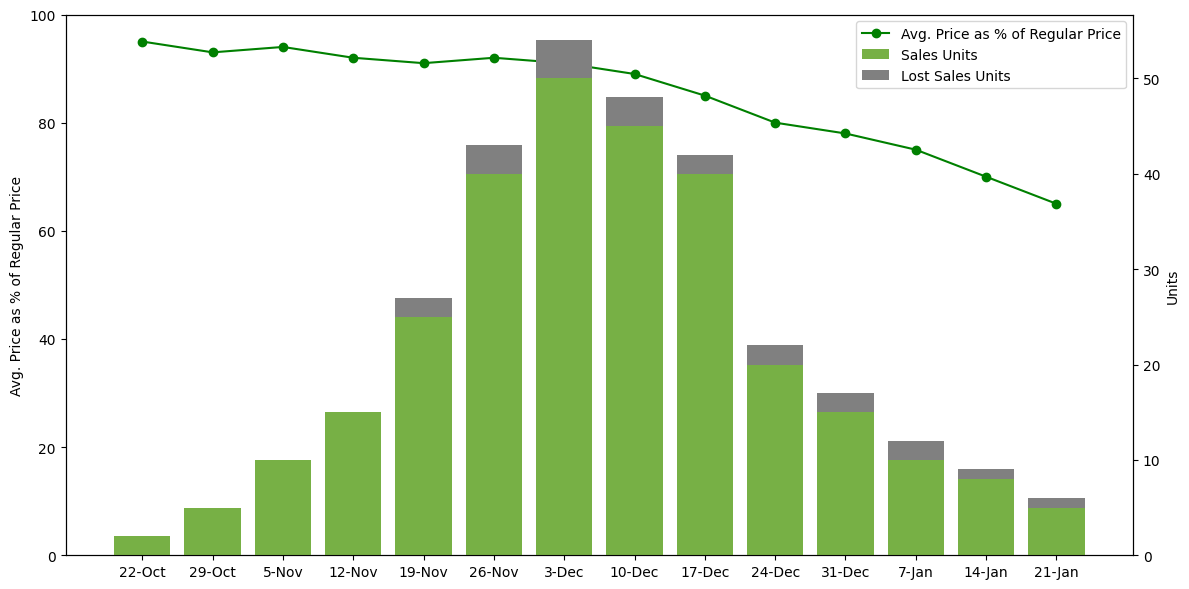

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
dates = ['22-Oct', '29-Oct', '5-Nov', '12-Nov', '19-Nov', '26-Nov', '3-Dec', 
         '10-Dec', '17-Dec', '24-Dec', '31-Dec', '7-Jan', '14-Jan', '21-Jan']
avg_price_pct = [95, 93, 94, 92, 91, 92, 91, 89, 85, 80, 78, 75, 70, 65]
sales_units = [2, 5, 10, 15, 25, 40, 50, 45, 40, 20, 15, 10, 8, 5]
lost_sales_units = [0, 0, 0, 0, 2, 3, 4, 3, 2, 2, 2, 2, 1, 1]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Avg. Price as % of Regular Price
ax1.plot(dates, avg_price_pct, color='green', marker='o', label='Avg. Price as % of Regular Price')
ax1.set_ylabel('Avg. Price as % of Regular Price', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 100)

# Creating a second y-axis to plot Sales Units and Lost Sales Units
ax2 = ax1.twinx()

# Plotting Sales Units as bars with further increased width
bar_width = 0.8
bar_positions = np.arange(len(dates))
ax2.bar(bar_positions, sales_units, color='#77B045', width=bar_width, label='Sales Units')

# Adding Lost Sales Units on top of Sales Units
ax2.bar(bar_positions, lost_sales_units, color='grey', width=bar_width, bottom=sales_units, label='Lost Sales Units')

# Adjusting x-axis and adding labels
ax2.set_xticks(bar_positions)
ax2.set_xticklabels(dates, rotation=45, ha='right')
ax2.set_ylabel('Units')
ax2.set_xlabel('Date')  # Adding X-axis title

# Adding legends
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Showing the plot
plt.tight_layout()
plt.show()

Range chart for Sales Velocity

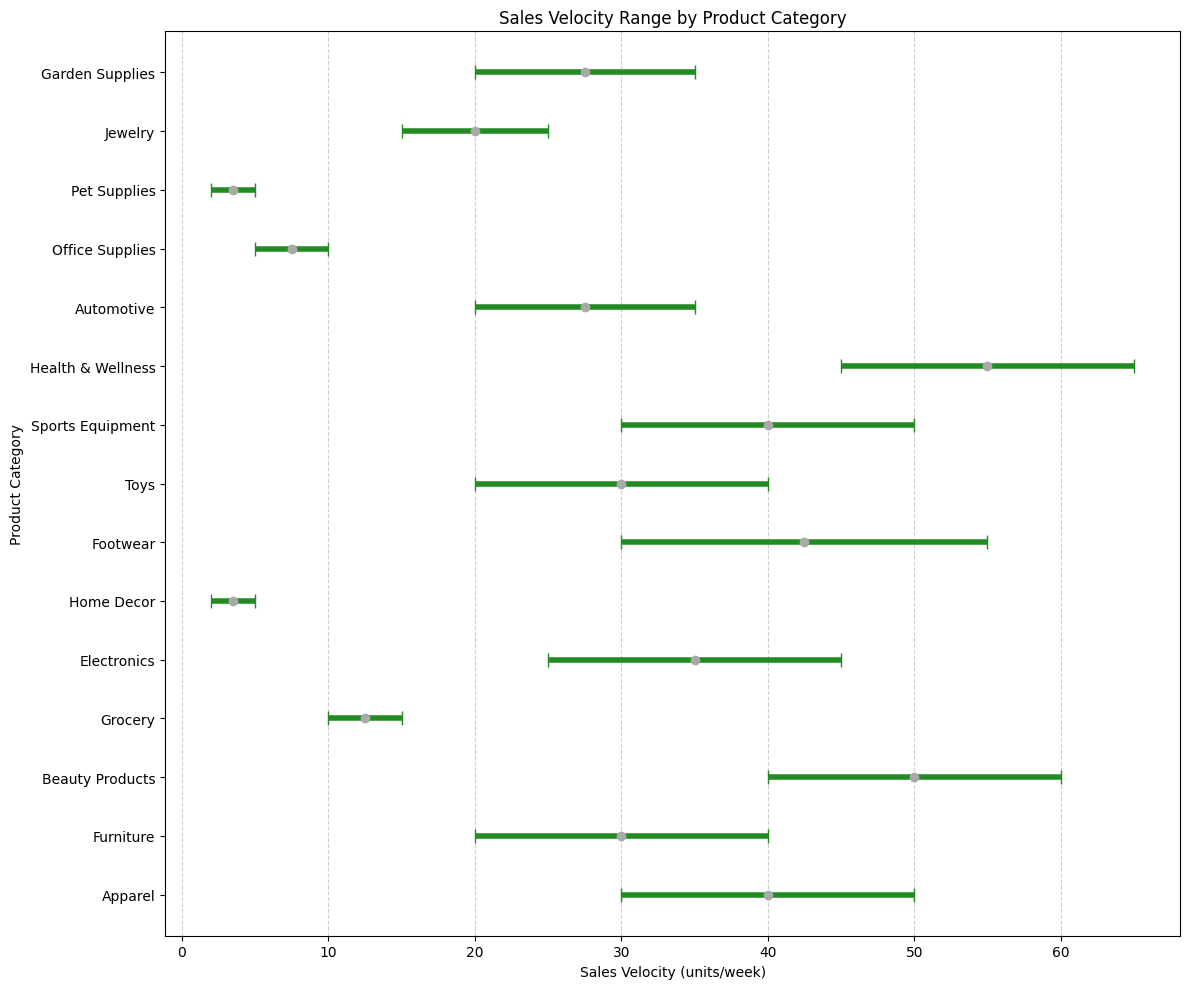

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "C:/Users/bhavy/Downloads/one.csv"
data = pd.read_csv(file_path)

# Function to safely convert values to integers
def parse_range(value):
    try:
        # Split the range and convert to integers
        min_val, max_val = value.split('-')
        return int(min_val), int(max_val)
    except ValueError:
        # Handle any unexpected values by returning NaNs
        return None, None

# Apply the parsing function to extract min and max Sales Velocity values
data[['Velocity Min', 'Velocity Max']] = data['Sales Velocity (units/week)'].apply(parse_range).apply(pd.Series)

# Drop rows with missing or invalid data
data = data.dropna(subset=['Velocity Min', 'Velocity Max'])

# Plotting the bar range chart with increased thickness of the green bars and grey center points
plt.figure(figsize=(12, 10))

# Define colors and set a thicker line width for the error bars
error_color = '#228B22'  # Green for the range
point_color = '#A9A9A9'  # Grey for the center points
line_width = 4  # Increase the thickness of the error bars

# Create the bar range chart with the orientation switched
for index, row in data.iterrows():
    # Plot the range with increased thickness and green error bars
    plt.errorbar((row['Velocity Min'] + row['Velocity Max']) / 2,  # Mean of min and max for the bar centers
                 row['Product Category'], 
                 xerr=(row['Velocity Max'] - row['Velocity Min']) / 2,  # Error range
                 fmt='o', 
                 ecolor=error_color, 
                 capsize=5, 
                 linestyle='None', 
                 elinewidth=line_width,  # Set the thickness of the bars
                 color=point_color)  # Grey for the center points

# Set labels and title
plt.ylabel('Product Category')
plt.xlabel('Sales Velocity (units/week)')
plt.title('Sales Velocity Range by Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Display the chart
plt.tight_layout()
plt.show()

Waterfall for RTV impact on Inventory Health Metrics

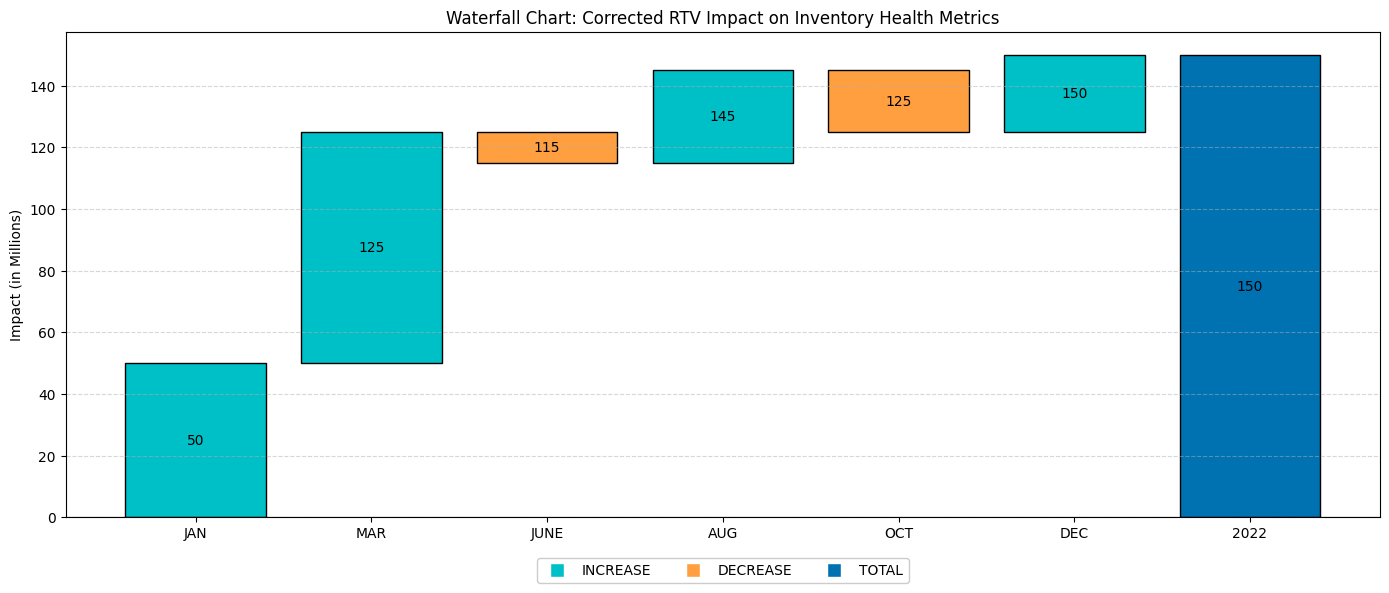

In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data for the waterfall chart based on the image provided
categories = ['JAN', 'MAR', 'JUNE', 'AUG', 'OCT', 'DEC', '2022']
values = [50, 75, -10, 30, -20, 25]  # Sample values for demonstration

# Calculate the cumulative values to position bars correctly in the waterfall format
cumulative = [0]  # Start at zero
cumulative_positions = [0]  # First position starts at zero
for value in values:
    cumulative_positions.append(cumulative_positions[-1] + value)

# Final value should reflect the total cumulative value
total_value = cumulative_positions[-1]

# Define the colors for each type of change
colors = ['#00C0C7' if val > 0 else '#FF9F40' for val in values] + ['#0072B2']

# Plotting the waterfall chart
plt.figure(figsize=(14, 6))
plt.bar(categories[:-1], values, bottom=cumulative_positions[:-1], color=colors[:-1], edgecolor='black')
plt.bar(categories[-1], total_value, bottom=0, color=colors[-1], edgecolor='black')

# Adding value labels to each bar
for i, (pos, val) in enumerate(zip(cumulative_positions[:-1], values)):
    plt.text(i, pos + val / 2, f'{cumulative_positions[i + 1]}', ha='center', va='center', fontsize=10, color='black')

# Annotate the total bar with the final cumulative value
plt.text(len(categories) - 1, total_value / 2, f'{total_value}', ha='center', va='center', fontsize=10, color='black')

# Formatting the chart
plt.title('Waterfall Chart: Corrected RTV Impact on Inventory Health Metrics')
plt.ylabel('Impact (in Millions)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.8)  # Zero line for reference

# Custom legend with bars instead of lines
custom_legend = [Line2D([0], [0], color='w', marker='s', markersize=10, markerfacecolor='#00C0C7', label='INCREASE'),
                 Line2D([0], [0], color='w', marker='s', markersize=10, markerfacecolor='#FF9F40', label='DECREASE'),
                 Line2D([0], [0], color='w', marker='s', markersize=10, markerfacecolor='#0072B2', label='TOTAL')]

plt.legend(handles=custom_legend, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, 
           facecolor='white', framealpha=1, fontsize=10)

plt.tight_layout()
plt.show()

Heatmap for Inventory Turnover

C:\Users\bhavy\AppData\Local\Temp\ipykernel_4708\342770621.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivoted_data = sku_store_turnover_data.groupby('Vendor').apply(lambda x: x.iloc[:, :-1]).reset_index(level=0, drop=True)


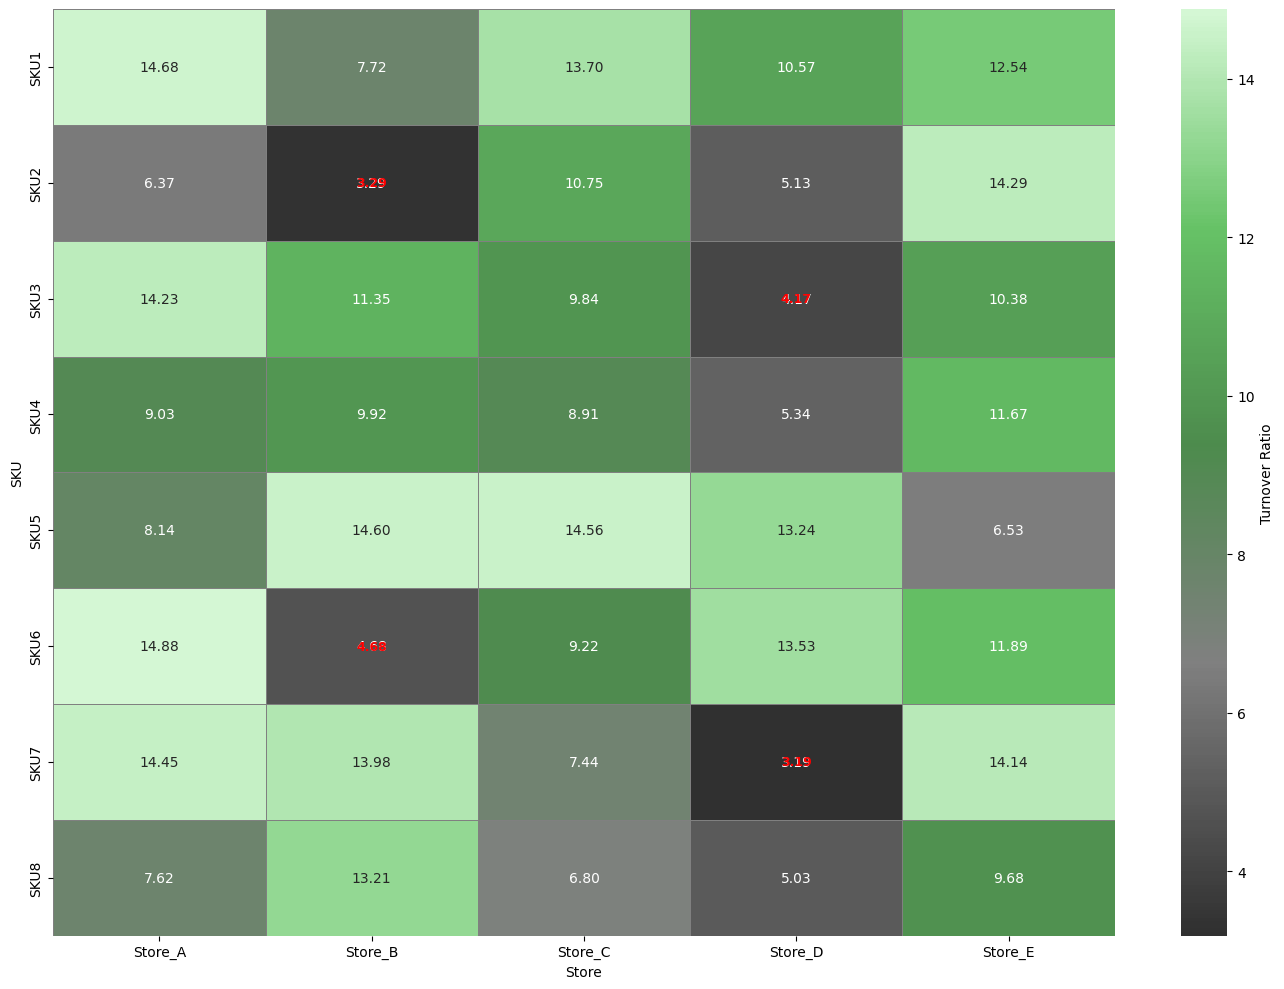

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Sample data for SKUs, Stores, and Vendors
stores = ['Store_A', 'Store_B', 'Store_C', 'Store_D', 'Store_E']
skus = ['SKU_001', 'SKU_002', 'SKU_003', 'SKU_004', 'SKU_005', 'SKU_006', 'SKU_007', 'SKU_008']
vendors = ['Vendor_1', 'Vendor_2', 'Vendor_1', 'Vendor_3', 'Vendor_2', 'Vendor_3', 'Vendor_1', 'Vendor_2']
turnover_data = np.random.uniform(low=3, high=15, size=(8, 5))  # Simulated turnover ratios for SKUs across stores

# Creating a DataFrame for SKUs, Stores, and Vendor association
sku_store_turnover_data = pd.DataFrame(turnover_data, columns=stores, index=skus)
sku_store_turnover_data['Vendor'] = vendors  # Adding Vendor information

# Grouping data by Vendor and preparing for visualization
pivoted_data = sku_store_turnover_data.groupby('Vendor').apply(lambda x: x.iloc[:, :-1]).reset_index(level=0, drop=True)

# Creating a custom color map that transitions from black to grey, green, and then light green
reversed_colors = ['#000000', '#404040', '#808080', '#4d8b4d', '#66c266', '#d4f7d4']
reversed_cmap = LinearSegmentedColormap.from_list('reversed_cmap', reversed_colors)

# Creating customized SKU labels as SKU1, SKU2, etc.
sku_labels = [f'SKU{i+1}' for i in range(len(pivoted_data))]

# Plotting the Heat Map with the reversed color scale
plt.figure(figsize=(14, 10))
sns.heatmap(pivoted_data, annot=True, fmt=".2f", cmap=reversed_cmap, cbar_kws={'label': 'Turnover Ratio'}, 
            linewidths=0.5, linecolor='grey', center=8, yticklabels=sku_labels)

# Emphasizing low turnover ratios with bold red text
for i, (sku, row) in enumerate(pivoted_data.iterrows()):
    for j, value in enumerate(row):
        if value < 5:  # Highlight low performers with their actual ratio value in red
            plt.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color='red', fontsize=9, weight='bold')

plt.xlabel('Store')
plt.ylabel('SKU')
plt.tight_layout()
plt.show()

Radar Chart gif

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the CSV file
file_path = "C:/Users/bhavy/Downloads/one.csv"
data = pd.read_csv(file_path)

# Function to parse the target ranges from string format
def parse_range(value):
    min_val, max_val = value.split('-')
    return (int(min_val), int(max_val))

# Function to create radar chart for a given category
def create_radar_chart(category):
    # Extract data specifically for the selected category and parse target values
    category_data = data[data['Product Category'] == category]
    
    # Parse the values
    target_values_doh = parse_range(category_data['Days on Hand (DOH, days)'].values[0])
    target_values_str = parse_range(category_data['Sell Through Rate (STR, %)'].values[0])
    target_values_velocity = parse_range(category_data['Sales Velocity (units/week)'].values[0])
    target_values_osa = parse_range(category_data['On-Shelf Availability (OSA, %)'].values[0])

    # Setting up target ranges for the lower and upper ends
    values_lower = [
        target_values_velocity[0],  
        target_values_doh[0],       
        target_values_str[0],       
        target_values_osa[0]        
    ]
    values_lower += values_lower[:1]

    values_upper = [
        target_values_velocity[1],  
        target_values_doh[1],       
        target_values_str[1],       
        target_values_osa[1]        
    ]
    values_upper += values_upper[:1]

    # Setting up the radar chart for the lower and upper target values
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    metrics = ['Sales Velocity', 'DOH', 'STR', 'OSA']
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=10, fontweight='bold', color='#434343')
    ax.set_ylim(0, 160)

    ax.plot(angles, values_lower, color='#ADAFB2', linewidth=2.5, linestyle='dashed', label='Lower End of Range')
    ax.fill(angles, values_lower, color='#434343', alpha=0.4)
    ax.plot(angles, values_upper, color='#ADAFB2', linewidth=2.5, linestyle='dashed', label='Upper End of Range')
    ax.fill_between(angles, values_lower, values_upper, color='#434343', alpha=0.3)

    ax.grid(color='gray', linestyle='--', linewidth=0.6, alpha=0.6)
    ax.spines['polar'].set_visible(False)
    ax.set_rlabel_position(0)
    ax.tick_params(axis='y', colors='gray', labelsize=10)
    ax.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1.15), frameon=False)

    plt.close(fig)
    return fig

# Create frames for each category
categories = data['Product Category'].unique()
frames = []

for category in categories:
    fig = create_radar_chart(category)
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(Image.fromarray(img))

# Save as GIF
frames[0].save('radar_chart_animation.gif', format='GIF', append_images=frames[1:], save_all=True, duration=1000, loop=0)

print("GIF saved as 'radar_chart_animation.gif'")

C:\Users\bhavy\AppData\Local\Temp\ipykernel_4708\1890122322.py:74: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\bhavy\AppData\Local\Temp\ipykernel_4708\1890122322.py:74: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\bhavy\AppData\Local\Temp\ipykernel_4708\1890122322.py:74: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\bhavy\AppData\Local\Temp\ipykernel_4708\1890122322.py:74: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in

GIF saved as 'radar_chart_animation.gif'
